In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#import csv temp2022
data =pd.read_csv('temp2022.csv')
data

,Unnamed: 0,Month,temperature,Normal_91-20,Hightest_91-20,Lowest_91-20,diff_temp-normal,diff_temp-month,diff_normal-month,hightest_23,lowest_23
0,0,Januari,0.5,-0.9,4.1,-11.2,-0.4,0.0,0.0,0.9,-11.2
1,1,Febuari,0.9,-1.0,4.3,10.8,-0.1,0.4,0.1,1.0,10.8
2,2,Mars,4.1,1.7,4.8,-6.5,2.4,3.2,0.7,6.5,-6.5
3,3,April,5.6,6.3,9.1,0.8,-0.7,1.5,4.6,6.3,0.8
4,4,Maj,11.5,11.4,16.1,5.7,0.1,5.9,5.1,11.6,5.7
5,5,Juni,18.1,15.7,19.3,10.4,2.4,6.6,4.3,20.5,10.4
6,6,Juli,18.4,18.6,22.5,13.7,-0.2,0.3,2.9,18.6,13.7
7,7,Augusti,19.8,17.7,21.2,12.9,2.1,1.4,-0.9,21.9,12.9
8,8,September,12.2,13.1,16.0,8.5,-0.9,-7.6,-4.6,13.1,8.5
9,9,Oktober,10.1,7.7,11.0,3.8,2.4,-2.1,-5.4,12.5,3.8


In [17]:
data['temperature']

0      0.5
1      0.9
2      4.1
3      5.6
4     11.5
5     18.1
6     18.4
7     19.8
8     12.2
9     10.1
10     5.5
11    -1.4
Name: temperature, dtype: float64

In [18]:
#crate array 'x' from month and matrix 
x = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0])
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [19]:
# crate array 'y' from temperature and matrix
y = np.array([0.5,0.9,4.1,5.6,11.5,18.1,18.4,19.8,12.2,10.1,5.5,-1.4])
y

array([ 0.5,  0.9,  4.1,  5.6, 11.5, 18.1, 18.4, 19.8, 12.2, 10.1,  5.5,
       -1.4])

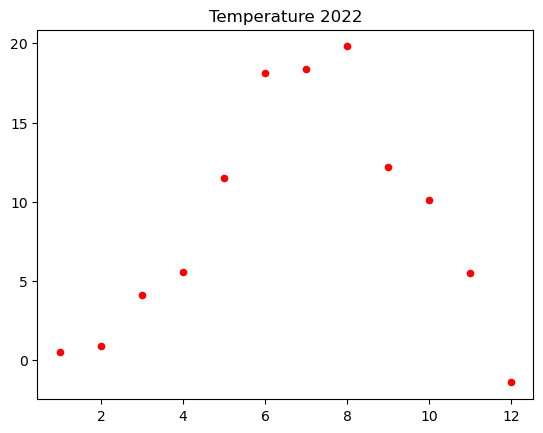

In [20]:
#crate plot
plt.scatter(x,y, s= 20, color='red')
plt.title('Temperature 2022')
plt.show()

In [5]:
#crate matrix kx+m; k=1, m=1
a = []
for i in range(0, len(x)):
 a.append(x[i])
 a.append(1)
A = np.array(a,dtype=float)
A = A.reshape(len(x), 2)
A

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.]])

In [6]:
Y = np.array(y,dtype=float)
Y

array([ 0.5,  0.9,  4.1,  5.6, 11.5, 18.1, 18.4, 19.8, 12.2, 10.1,  5.5,
       -1.4])

In [7]:
#create normal equation

At=A.T
At

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [8]:
A = np.dot(At, A)
A

array([[650.,  78.],
       [ 78.,  12.]])

In [9]:
Y = np.dot(At, Y)
Y

array([744.8, 105.3])

In [10]:
# create function Gauss Elimination
def gaussElim(A,Y):
    n = len(Y)
    # Elimination phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k] != 0.0: #if not null define λ
                
                lam = A [i,k]/A[k,k]  #calculate the new row of the matrix
                
                A[i,k+1:n] = A[i,k+1:n] - lam*A[k,k+1:n]  #update vector Y
                
                Y[i] = Y[i] - lam*Y[k]  #backward substitution
                
    for k in range(n-1,-1,-1):
        Y[k] = (Y[k] - np.dot(A[k,k+1:n],Y[k+1:n]))/A[k,k]
    
    return Y

gauss = gaussElim(A,Y)
print("gauss =\n",gauss)


gauss =
 [0.42202797 6.03181818]


In [11]:
# write a best line and plot a line
k = round(gauss[0], 2)
m = round(gauss[1], 2)
if (m<0):
 print(f'y={k}x{m}')
else:
 print(f'y={k}x+{m}')

y=0.42x+6.03


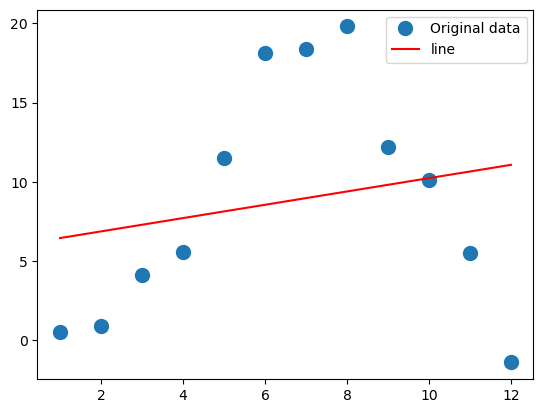

In [12]:
# plot
k = 0.42
m = 6.03
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, k*x +m, 'r', label='line')
plt.legend()
plt.show()

In [13]:
def parabola (x1,y1, x2,y2, x3,y3):
    
    denom = (x1-x2)*(x1-x3)*(x2*x3);
    A = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom;
    B = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom;
    C = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom;
    
    return A,B,C

#define points
x1,y1 = [7.0,18.4]
x2,y2 = [1.0,0.5]
x3,y3 = [12.0,-1.4]

a,b,c = parabola(x1,y2, x2,y2, x3,y3)
print(a,b,c)

0.03166666666666666 -0.2533333333333333 -0.23666666666666666


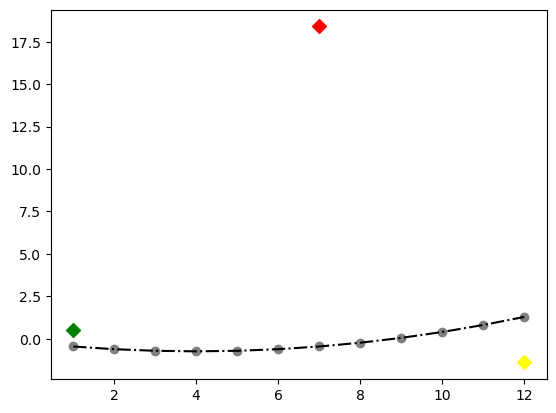

In [14]:
#define x range for while to calc parabola
x_pos =np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0])
y_pos =[]

#Calculate y values

for x in range(len(x_pos)):
    x_val=x_pos[x]
    y=(a*(x_val**2))+(b*x_val)+c
    y_pos.append(y)
    
# Plot the parabola (+ the known points)
plt.plot(x_pos, y_pos, linestyle='-.', color='black') # parabola line
plt.scatter(x_pos, y_pos, color='gray') # parabola points
plt.scatter(x1,y1,color='red',marker="D",s=50) # 1st known xy
plt.scatter(x2,y2,color='green',marker="D",s=50) # 2nd known xy
plt.scatter(x3,y3,color='yellow',marker="D",s=50) # 3rd known xy
plt.show()
